### MNIST 손글씨 다중분류 - FCN

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

seed = 2023

np.random.seed(seed)
tf.random.set_seed(seed)
import warnings
warnings.filterwarnings('ignore')

- 데이터 전처리

In [23]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [24]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

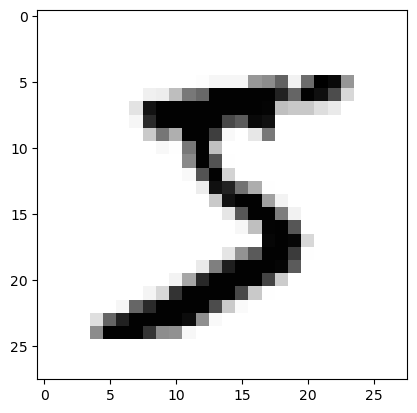

In [25]:
plt.imshow(X_train[0], cmap='Greys');

In [26]:
import sys
for row in X_train[0]:
    for col in row:
        sys.stdout.write(f'{col:3d} ')
    sys.stdout.write('\n')

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [27]:
# X scaling
# 이미지는 0~255의 값을 가지는데, 이를 0~1 사이의 값으로 변환
X_train = X_train / 255.
X_test = X_test / 255.


In [28]:
# Fully Connected Network(Dense layer)은 1차원 데이터만 처리 가능
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [29]:
# y 값의 분포
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [30]:
# One hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

- 모델 정의/설정/학습/평가

In [31]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [32]:
model = Sequential([
    Dense(1000, input_dim=784, activation='relu'),
    Dense(256, activation='relu'),
    Dense(48, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1000)              785000    
                                                                 
 dense_10 (Dense)            (None, 256)               256256    
                                                                 
 dense_11 (Dense)            (None, 48)                12336     
                                                                 
 dense_12 (Dense)            (None, 10)                490       
                                                                 
Total params: 1054082 (4.02 MB)
Trainable params: 1054082 (4.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
mc = ModelCheckpoint('models/best_mnist.h5', verbose=1, save_best_only=True)
es = EarlyStopping(patience=5)
hist = model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=256, verbose=1,
                 callbacks=[mc, es])

Epoch 1/100
188/188 [==============================] - ETA: 0s - loss: 0.3034 - accuracy: 0.9121
Epoch 1: val_loss improved from inf to 0.12942, saving model to models\best_mnist.h5
188/188 [==============================] - 5s 22ms/step - loss: 0.3034 - accuracy: 0.9121 - val_loss: 0.1294 - val_accuracy: 0.9627
Epoch 2/100
186/188 [============================>.] - ETA: 0s - loss: 0.1016 - accuracy: 0.9691
Epoch 2: val_loss improved from 0.12942 to 0.09319, saving model to models\best_mnist.h5
188/188 [==============================] - 4s 21ms/step - loss: 0.1013 - accuracy: 0.9692 - val_loss: 0.0932 - val_accuracy: 0.9716
Epoch 3/100
187/188 [============================>.] - ETA: 0s - loss: 0.0609 - accuracy: 0.9819
Epoch 3: val_loss improved from 0.09319 to 0.08901, saving model to models\best_mnist.h5
188/188 [==============================] - 4s 21ms/step - loss: 0.0608 - accuracy: 0.9819 - val_loss: 0.0890 - val_accuracy: 0.9746
Epoch 4/100
186/188 [============================>

In [35]:
best_model = load_model('models/best_mnist.h5')
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0744 - accuracy: 0.9791


[0.07441125810146332, 0.9790999889373779]

- 시각화

In [36]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
x_len = np.arange(len(y_acc))

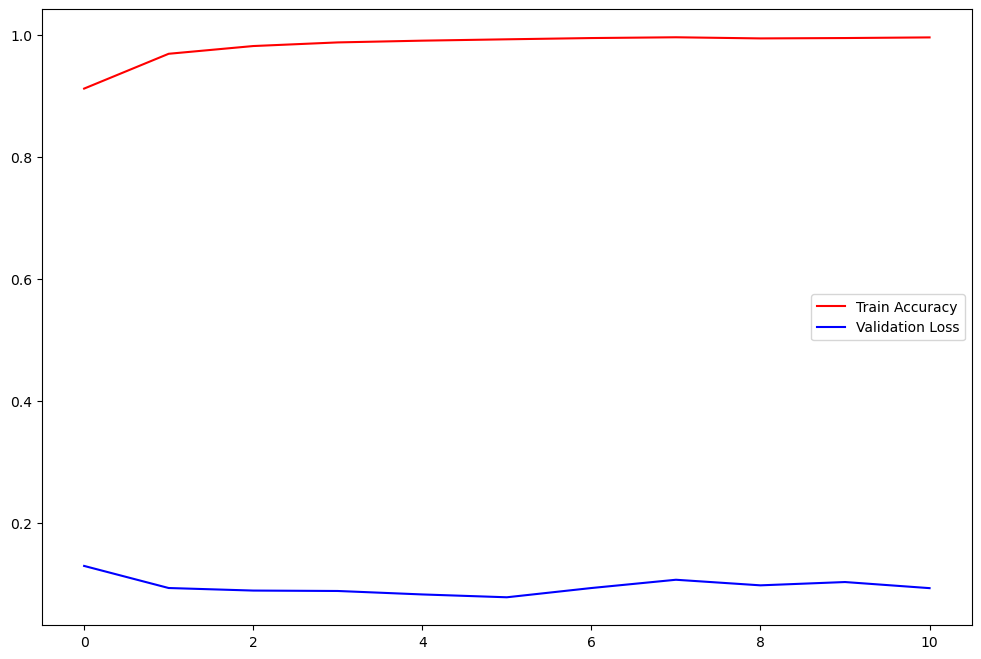

In [37]:
plt.figure(figsize=(12, 8))
plt.plot(x_len, y_acc, c='red', label='Train Accuracy')
plt.plot(x_len, y_vloss, c='blue', label='Validation Loss')
plt.legend()
plt.show()